ALSA lib pcm_dsnoop.c:618:(snd_pcm_dsnoop_open) unable to open slave
ALSA lib pcm_dmix.c:1052:(snd_pcm_dmix_open) unable to open slave
ALSA lib pcm.c:2495:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.rear
ALSA lib pcm.c:2495:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.center_lfe
ALSA lib pcm.c:2495:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.side
ALSA lib pcm_dmix.c:1052:(snd_pcm_dmix_open) unable to open slave
ALSA lib pcm_dsnoop.c:618:(snd_pcm_dsnoop_open) unable to open slave
ALSA lib pcm_dmix.c:1052:(snd_pcm_dmix_open) unable to open slave
ALSA lib pcm.c:2495:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.rear
ALSA lib pcm.c:2495:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.center_lfe
ALSA lib pcm.c:2495:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.side
ALSA lib pcm_dmix.c:1052:(snd_pcm_dmix_open) unable to open slave
ALSA lib pcm_dsnoop.c:618:(snd_pcm_dsnoop_open) unable to open slave
ALSA lib pcm_dmix.c:1052:(snd_pcm_dmix_open) unable to open slave
ALSA lib pcm.c:2495:(snd_

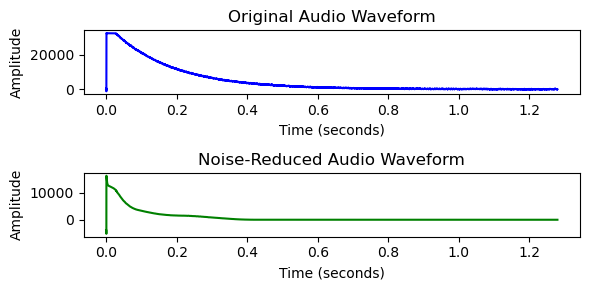

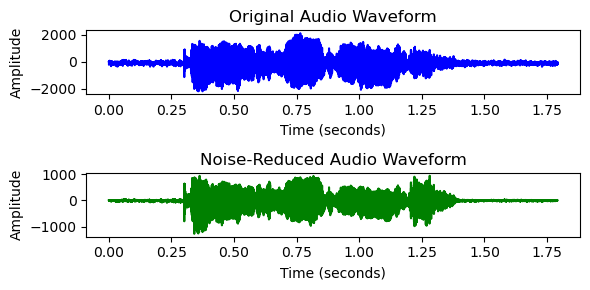

ALSA lib pcm_dsnoop.c:618:(snd_pcm_dsnoop_open) unable to open slave
ALSA lib pcm_dmix.c:1052:(snd_pcm_dmix_open) unable to open slave
ALSA lib pcm.c:2495:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.rear
ALSA lib pcm.c:2495:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.center_lfe
ALSA lib pcm.c:2495:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.side
ALSA lib pcm_dmix.c:1052:(snd_pcm_dmix_open) unable to open slave
ALSA lib pcm_dsnoop.c:618:(snd_pcm_dsnoop_open) unable to open slave
ALSA lib pcm_dmix.c:1052:(snd_pcm_dmix_open) unable to open slave
ALSA lib pcm.c:2495:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.rear
ALSA lib pcm.c:2495:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.center_lfe
ALSA lib pcm.c:2495:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.side
ALSA lib pcm_dmix.c:1052:(snd_pcm_dmix_open) unable to open slave


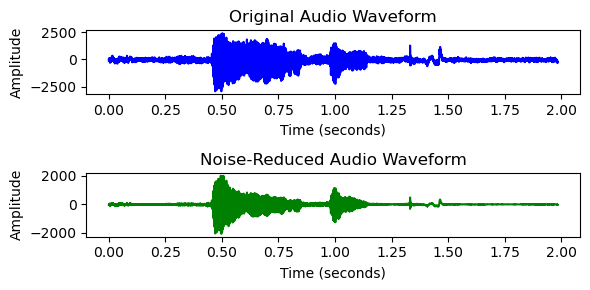

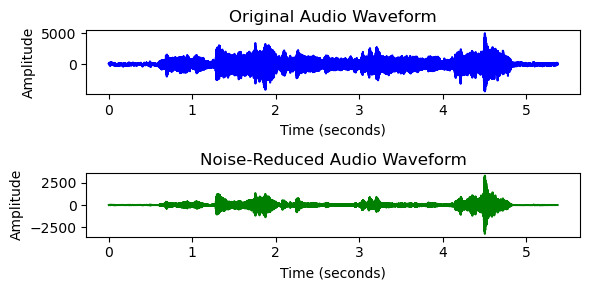

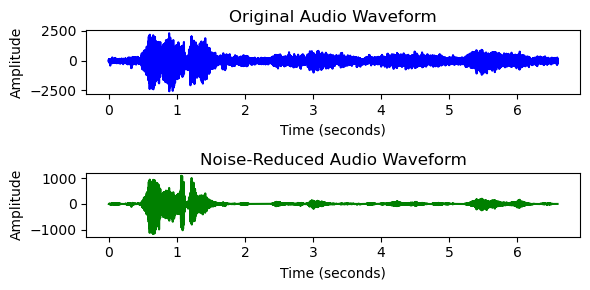

Exception in thread Thread-31 (run_assistant):
Traceback (most recent call last):
  File "/home/rgukt/anaconda3/lib/python3.11/threading.py", line 1045, in _bootstrap_inner
    self.run()
  File "/home/rgukt/anaconda3/lib/python3.11/threading.py", line 982, in run
    self._target(*self._args, **self._kwargs)
  File "/tmp/ipykernel_3352/3650418427.py", line 106, in run_assistant
  File "/tmp/ipykernel_3352/3650418427.py", line 72, in listen_command
  File "/home/rgukt/anaconda3/lib/python3.11/tkinter/__init__.py", line 3808, in insert
    self.tk.call((self._w, 'insert', index, chars) + args)
RuntimeError: main thread is not in main loop


In [7]:
import tkinter as tk
from tkinter.scrolledtext import ScrolledText
from tkinter import ttk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt
import threading
import datetime
import speech_recognition as sr
import noisereduce as nr
import numpy as np
import wave
from gtts import gTTS
from playsound import playsound
import randfacts
from tell_joke import *
from weather import *
from read_news import *
from selenium_web import *
from youtube import *

# Function to convert text to speech
def speak(text, output_widget):
    output_widget.insert(tk.END, f"Assistant: {text}\n")
    output_widget.see(tk.END)
    tts = gTTS(text=text, lang='en', slow=False)
    tts.save("output.mp3")
    playsound("output.mp3")

# Function to return a greeting based on the time of day
def wishme():
    hour = int(datetime.datetime.now().hour)
    if 0 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 16:
        return "Afternoon"
    else:
        return "Evening"

# Function to plot waveforms on the interface
def plot_waveforms(original_audio_data, reduced_audio_data, graph_frame, sample_rate=16000):
    # Clear previous plot
    for widget in graph_frame.winfo_children():
        widget.destroy()

    # Create a time axis
    time_axis_original = np.linspace(0, len(original_audio_data) / sample_rate, num=len(original_audio_data))
    time_axis_reduced = np.linspace(0, len(reduced_audio_data) / sample_rate, num=len(reduced_audio_data))

    # Create the plot
    fig, axes = plt.subplots(2, 1, figsize=(6, 3))
    axes[0].plot(time_axis_original, original_audio_data, color='blue')
    axes[0].set_title("Original Audio Waveform")
    axes[0].set_xlabel("Time (seconds)")
    axes[0].set_ylabel("Amplitude")

    axes[1].plot(time_axis_reduced, reduced_audio_data, color='green')
    axes[1].set_title("Noise-Reduced Audio Waveform")
    axes[1].set_xlabel("Time (seconds)")
    axes[1].set_ylabel("Amplitude")

    fig.tight_layout()

    # Embed plot in the interface
    canvas = FigureCanvasTkAgg(fig, master=graph_frame)
    canvas.draw()
    canvas.get_tk_widget().pack()

# Function to listen to the user's command
def listen_command(output_widget, graph_frame):
    with sr.Microphone(sample_rate=16000) as source:
        r = sr.Recognizer()
        output_widget.insert(tk.END, "Assistant: Listening...\n")
        output_widget.see(tk.END)

        try:
            audio = r.listen(source)

            # Convert audio to numpy array for noise reduction
            audio_data = np.frombuffer(audio.get_raw_data(), dtype=np.int16)

            # Apply noise reduction
            reduced_noise_audio = nr.reduce_noise(y=audio_data, sr=16000)

            # Plot waveforms in the interface
            plot_waveforms(audio_data, reduced_noise_audio, graph_frame)

            # Convert reduced audio back to AudioData format for recognizer
            reduced_audio_data = sr.AudioData(reduced_noise_audio.tobytes(), 16000, 2)

            # Recognize text from the reduced audio
            text_reduced = r.recognize_google(reduced_audio_data, language="en-US")
            output_widget.insert(tk.END, f"You: {text_reduced}\n")
            output_widget.see(tk.END)
            return text_reduced.lower()
        except sr.UnknownValueError:
            output_widget.insert(tk.END, "Assistant: Could not recognize the audio.\n")
            output_widget.see(tk.END)
            return None

# Function to run the assistant
def run_assistant(output_widget, graph_frame):
    speak("Hello, ma'am. Good " + wishme() + ". I am your voice assistant.", output_widget)

    while True:
        speak("What can I do for you?", output_widget)
        command = listen_command(output_widget, graph_frame)

        if command is None:
            continue

        if "quit" in command or "exit" in command:
            speak("Goodbye ma'am. Have a nice day!", output_widget)
            break
        elif "time" in command:
            now = datetime.datetime.now()
            response = f"Today is {now.strftime('%d')} of {now.strftime('%B')} and it's currently {now.strftime('%I')}:{now.strftime('%M')} {now.strftime('%p')}."
            speak(response, output_widget)
        elif "temperature" in command:
            temp_value = str(temp())  # Replace with actual weather function
            des_value = str(des())   # Replace with actual weather description function
            response = f"Today's temperature is {temp_value} degrees Celsius with {des_value}."
            speak(response, output_widget)
        elif "fact" in command or "facts" in command:
            fact = randfacts.getFact()
            response = f"Did you know that, {fact}"
            speak(response, output_widget)
        elif "joke" in command or "jokes" in command:
            joke_list = joke()
            for line in joke_list:
                speak(line, output_widget)
        elif "news" in command or "read news" in command:
            speak("Sure, ma'am. Here are the top news headlines.", output_widget)
            news_list = news()  # Replace with your `news` function
            for item in news_list:
                speak(item, output_widget)
        elif "play music" in command or "play video" in command:
            speak("You want me to play which video?", output_widget)
            video = listen_command(output_widget, graph_frame)
            if video:
                speak(f"Playing {video} on YouTube.", output_widget)
                assist = Music()
                assist.play(video)
        elif "information" in command:
            speak("You need information related to which topic?", output_widget)
            topic = listen_command(output_widget, graph_frame)
            if topic:
                speak(f"Searching {topic} on Wikipedia.", output_widget)
                assist = Infow()
                assist.get_info(topic)
                speak("Here is the information I found.", output_widget)
        else:
            response = "I'm sorry, I didn't catch that. Could you please repeat?"
            speak(response, output_widget)

# GUI Application
def create_gui():
    root = tk.Tk()
    root.title("Voice Assistant GUI")
    root.geometry("900x700")

    # ScrolledText widget for displaying conversation
    output_widget = ScrolledText(root, wrap=tk.WORD, height=20, width=100)
    output_widget.pack(pady=10, padx=10)

    # Frame for the graph
    graph_frame = tk.Frame(root, height=300, width=600, bg="white")
    graph_frame.pack(pady=10, padx=10)

    # Buttons for starting and stopping the assistant
    button_frame = tk.Frame(root)
    button_frame.pack(pady=10)

    def start_assistant_thread():
        threading.Thread(target=run_assistant, args=(output_widget, graph_frame), daemon=True).start()

    start_button = tk.Button(button_frame, text="Start", command=start_assistant_thread, bg="green", fg="white", width=15)
    start_button.grid(row=0, column=0, padx=10)

    exit_button = tk.Button(button_frame, text="Exit", command=root.destroy, bg="red", fg="white", width=15)
    exit_button.grid(row=0, column=1, padx=10)

    root.mainloop()

# Run the GUI application
if __name__ == "__main__":
    create_gui()
